In [16]:
df = read.table("crabs.dat.txt", header = TRUE)

In [17]:
head(df)

crab,sat,y,weight,width,color,spine
1,8,1,3.05,28.3,2,3
2,0,0,1.55,22.5,3,3
3,9,1,2.30,26.0,1,1
4,0,0,2.10,24.8,3,3
5,4,1,2.60,26.0,3,3
6,0,0,2.10,23.8,2,3


In [18]:
df$color <- factor(df$color)
df$spine <- factor(df$spine)
df$y = factor(df$y)
is.factor(df$color)
is.factor(df$spine)

[1] TRUE

[1] TRUE

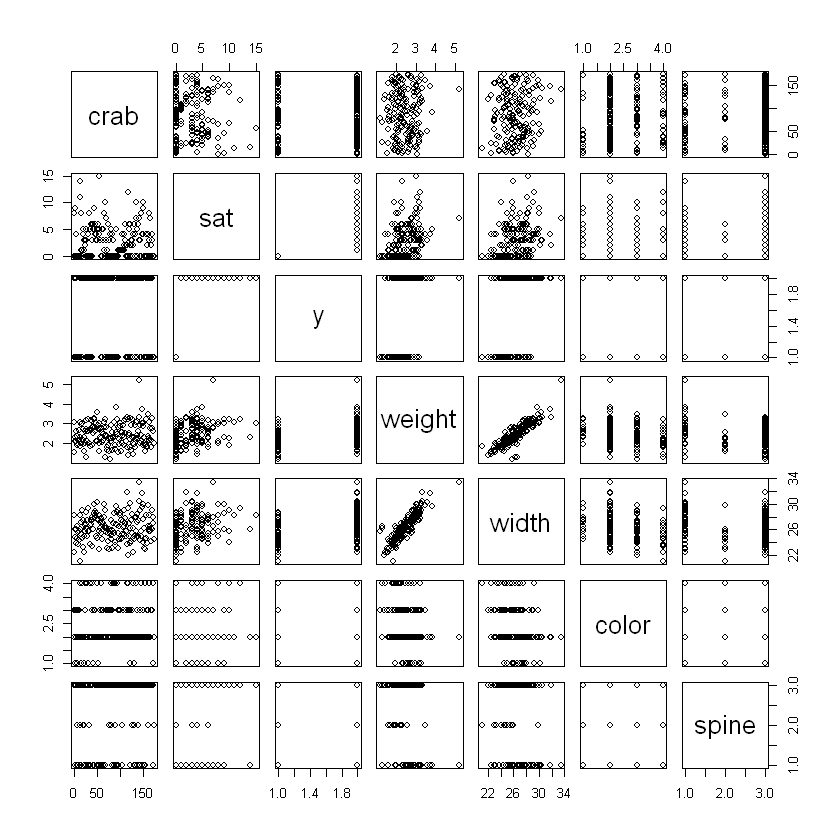

In [19]:
plot(df)

### Multinomial logistic regression

In [20]:
require(nnet)
require(MASS)

model <- multinom(spine ~ sat + y + weight + width + color, data=df)

# weights:  27 (16 variable)
initial  value 190.059926 
iter  10 value 117.019151
iter  20 value 110.296901
iter  30 value 109.701483
final  value 109.701476 
converged


In [21]:
summary(model)

Call:
multinom(formula = spine ~ sat + y + weight + width + color, 
    data = df)

Coefficients:
  (Intercept)         sat        y1    weight      width   color2    color3
2   18.895998 -0.07573979 0.2433465  1.185444 -0.8792969 0.055802 0.8835881
3   -3.256744 -0.05855609 0.7228371 -1.056373  0.1303693 3.137800 4.5917047
       color4
2 -0.01087206
3  5.21545296

Std. Errors:
  (Intercept)        sat        y1    weight     width    color2   color3
2    7.676307 0.18664097 1.0740549 1.5475019 0.4142711 0.9681688 1.197198
3    4.827164 0.08833453 0.6585594 0.8805518 0.2478043 1.0858460 1.225393
    color4
2 1.825799
3 1.497768

Residual Deviance: 219.403 
AIC: 251.403 

### Ordinal Logistic Regression

In [22]:
model1 <- polr(spine ~ sat + y + weight + width + color, data=df)

In [23]:
model1

Call:
polr(formula = spine ~ sat + y + weight + width + color, data = df)

Coefficients:
        sat          y1      weight       width      color2      color3 
-0.05304741  0.84083134 -1.42309036  0.29486810  2.44197143  3.52568380 
     color4 
 4.38446342 

Intercepts:
     1|2      2|3 
5.888859 6.461495 

Residual Deviance: 235.9888 
AIC: 253.9888 

### Poisson regression

In [26]:
df2 = read.table("crabs.dat.txt", header = TRUE)
df2$color <- factor(df2$color)
df2$y = factor(df2$y)

model2 = glm(spine ~ sat + y + weight + width + color, poisson, data = df2)

In [27]:
summary(model2)


Call:
glm(formula = spine ~ sat + y + weight + width + color, family = poisson, 
    data = df2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2842  -0.2786   0.1515   0.3177   1.3208  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.009538   0.978624  -0.010  0.99222   
sat         -0.007227   0.022171  -0.326  0.74444   
y1           0.091759   0.147520   0.622  0.53394   
weight      -0.132128   0.180487  -0.732  0.46413   
width        0.022427   0.049338   0.455  0.64942   
color2       0.581651   0.259186   2.244  0.02482 * 
color3       0.716702   0.268605   2.668  0.00763 **
color4       0.766032   0.284857   2.689  0.00716 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 56.157  on 172  degrees of freedom
Residual deviance: 44.605  on 165  degrees of freedom
AIC: 535.82

Number of Fisher Scoring iterations: 4
